# Predict red wine quality from physicochemical test

### Description about dataset 

[source](https://archive.ics.uci.edu/ml/datasets/wine+quality)

The dataset is related to red Vinho Verde wine samples, from the north of Portugal. The goal is to model wine quality based on physicochemical tests

### Brief explanation and reading material of used libraries

1. [Pandas][1]: Python libray for data manipulation and analysis (similar to excel)
2. [Seaborn][2]: Python data visualization library based on matplotlib
3. [Matplotlib][3]: Python plotting library 
4. [Sklearn][4]: Machine learning library which provies various classification, regression and clustering algorithm incluing [Support Vector Machine (SVM)][5],  [Random forrest][6], [Logistic Regression][7] etc.
5. [Sklearn.metrics][8]: Model evaluation
6. [Sklearn.preprocessing][9]: Package provides common functions and transformer classes to process raw data. 
7. [Sklearn.model_selection][10]: Package provdes methods to split data into train and test subset, cross validation, etc.

[1]: https://en.wikipedia.org/wiki/Pandas_(software)
[2]: https://seaborn.pydata.org/ 
[3]: https://matplotlib.org/
[4]: https://en.wikipedia.org/wiki/Scikit-learn
[5]: https://scikit-learn.org/stable/modules/svm.html
[6]: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
[7]: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
[8]: https://scikit-learn.org/stable/modules/model_evaluation.html
[9]:https://scikit-learn.org/stable/modules/preprocessing.html
[10]: https://scikit-learn.org/stable/model_selection.html#


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
%matplotlib inline

### Loading dataset

In [2]:
wine = pd.read_csv("red_wine_quality/train.csv")
wine.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,0
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,0
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,1
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,1
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,0


In [3]:
# information regaring data columns 
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1589 entries, 0 to 1588
Data columns (total 12 columns):
fixed acidity           1589 non-null float64
volatile acidity        1589 non-null float64
citric acid             1589 non-null float64
residual sugar          1589 non-null float64
chlorides               1589 non-null float64
free sulfur dioxide     1589 non-null float64
total sulfur dioxide    1589 non-null float64
density                 1589 non-null float64
pH                      1589 non-null float64
sulphates               1589 non-null float64
alcohol                 1589 non-null float64
quality                 1589 non-null int64
dtypes: float64(11), int64(1)
memory usage: 149.1 KB


### Analyzing dataset

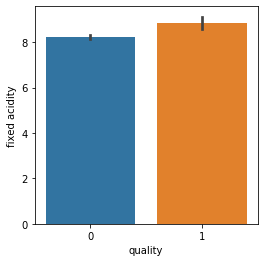

In [4]:
fig = plt.figure(figsize = (4,4))
sns.barplot(x = 'quality', y = 'fixed acidity', data = wine)

# Note: higher fixed acidity, better quality

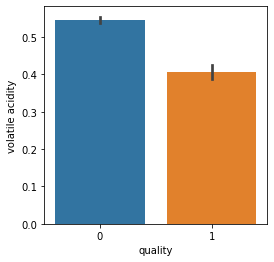

In [5]:
fig = plt.figure(figsize = (4,4))
sns.barplot(x = 'quality', y = 'volatile acidity', data = wine)

# Note: Less volatile acidity, better quality

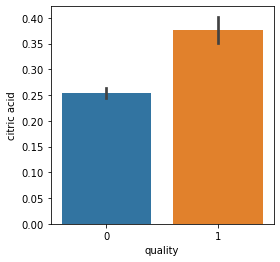

In [6]:
fig = plt.figure(figsize = (4,4))
sns.barplot(x = 'quality', y = 'citric acid', data = wine)

# Note: higer citric acid, better quality

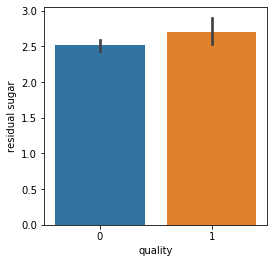

In [7]:
fig = plt.figure(figsize = (4,4))
sns.barplot(x = 'quality', y = 'residual sugar', data = wine)

#Note: higher residual sugar, better quality

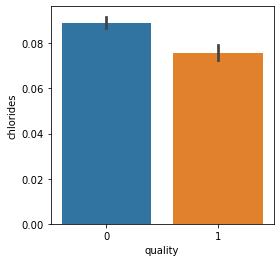

In [8]:
fig = plt.figure(figsize = (4,4))
sns.barplot(x = 'quality', y = 'chlorides', data = wine)

# Note: less chlorides, better quality

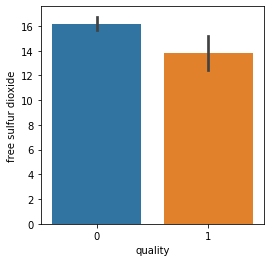

In [9]:
fig = plt.figure(figsize = (4,4))
sns.barplot(x = 'quality', y = 'free sulfur dioxide', data = wine)

# Note: less free sulfur dioxide, better quality

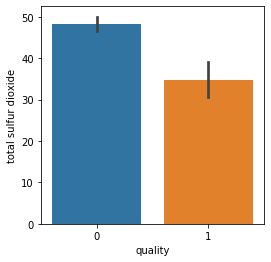

In [10]:
fig = plt.figure(figsize = (4,4))
sns.barplot(x = 'quality', y = 'total sulfur dioxide', data = wine)

# Note: less total sulfur, better quality

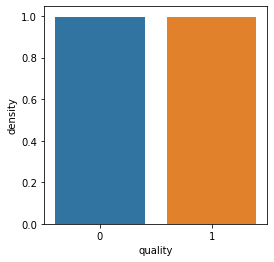

In [11]:
fig = plt.figure(figsize = (4,4))
sns.barplot(x = 'quality', y = 'density', data = wine)

# Note: density doesn't play a vital role in quality classification

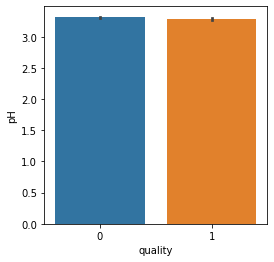

In [12]:
fig = plt.figure(figsize = (4,4))
sns.barplot(x = 'quality', y = 'pH', data = wine)

# Note: pH doesn't play a vital role in quality classification

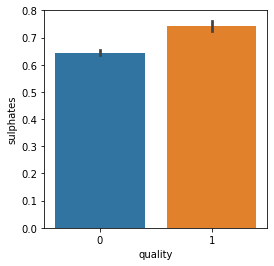

In [13]:
fig = plt.figure(figsize = (4,4))
sns.barplot(x = 'quality', y = 'sulphates', data = wine)

# Note: higher sulphates, better the quality

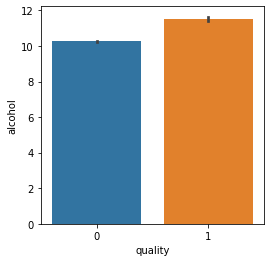

In [14]:
fig = plt.figure(figsize = (4,4))
sns.barplot(x = 'quality', y = 'alcohol', data = wine)

# Note: higher alcohol, better quality

### Preprocessing data

In [15]:
# non-important factors: density, pH

X = wine.drop(["quality", "density", "pH"], axis = 1)
X #define input variables


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.56,9.4
...,...,...,...,...,...,...,...,...,...
1584,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.58,10.5
1585,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.76,11.2
1586,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.75,11.0
1587,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.71,10.2


In [16]:
y = wine["quality"] # Define output variables
y

0       0
1       0
2       0
3       0
4       0
       ..
1584    0
1585    0
1586    0
1587    0
1588    0
Name: quality, Length: 1589, dtype: int64

In [17]:
#Train and Test splitting of data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [18]:
print("X_train: %i/ X_test: %i/ y_train: %i/ y_test: %i"%(len(X_train),len(X_test),len(y_train),len(y_test)))

X_train: 1271/ X_test: 318/ y_train: 1271/ y_test: 318


In [19]:
#Applying Standard scaling to get optimized result
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)
StandardScaler(copy=True, with_mean=True, with_std=True)

StandardScaler(copy=True, with_mean=True, with_std=True)

### Logistic Regression

In [20]:
clf = LogisticRegression()
clf.fit(X_train, y_train)
pred_clf = clf.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [21]:
print(classification_report(y_test, pred_clf))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92       270
           1       0.59      0.27      0.37        48

    accuracy                           0.86       318
   macro avg       0.74      0.62      0.65       318
weighted avg       0.84      0.86      0.84       318



### Random Forest Classifier

In [22]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [23]:
# Evaluate our model
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.91      0.99      0.94       270
           1       0.84      0.44      0.58        48

    accuracy                           0.90       318
   macro avg       0.87      0.71      0.76       318
weighted avg       0.90      0.90      0.89       318



### Support Vector Classifier

In [24]:
svc = SVC(gamma="scale")
svc.fit(X_train, y_train)
pred_svc = svc.predict(X_test)

In [25]:
print(classification_report(y_test, pred_svc))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       270
           1       0.72      0.27      0.39        48

    accuracy                           0.87       318
   macro avg       0.80      0.63      0.66       318
weighted avg       0.86      0.87      0.85       318



### Increase the accuracy of our models

In [26]:
#Finding best parameters for our SVC model
param = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
grid_svc = GridSearchCV(svc, param_grid=param, scoring='accuracy', cv=10)

In [27]:
grid_svc.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [1, 10], 'kernel': ('linear', 'rbf')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [28]:
#Best parameters for our svc model
grid_svc.best_params_

{'C': 10, 'kernel': 'rbf'}

In [29]:
#Let's run our SVC again with the best parameters.

svc2 = SVC(C = 10, kernel= 'rbf')
svc2.fit(X_train, y_train)
pred_svc2 = svc2.predict(X_test)

print(classification_report(y_test, pred_svc2))

              precision    recall  f1-score   support

           0       0.90      0.97      0.94       270
           1       0.74      0.42      0.53        48

    accuracy                           0.89       318
   macro avg       0.82      0.70      0.74       318
weighted avg       0.88      0.89      0.88       318



**SVC improves from 87% to 89% using Grid Search CV**

### Test our model on unknow dataset (test.csv)

In [30]:
X_train.shape

(1271, 9)

In [31]:
import numpy as np
x = np.asarray([[7.6,1.58,0,2.1,0.137,5,9,0.4,10.9]], dtype=float)
print (x.shape)

sc = StandardScaler()
sc.fit_transform(X)

print("Nonscale: ", x)
x = sc.transform(x)
print("Scaled: ", x)

(1, 9)
Nonscale:  [[ 7.6    1.58   0.     2.1    0.137  5.     9.     0.4   10.9  ]]
Scaled:  [[-0.41264971  5.9466063  -1.39275635 -0.31197077  1.06260435 -1.03975873
  -1.13958846 -1.52542265  0.44980171]]


In [32]:
pred_svc2 = svc2.predict(x)
print(pred_svc2)

pred_forrest = rfc.predict(x)
print(pred_forrest)

[0]
[0]


In [33]:
def predict_from_input(input_string):
    result_list = ["Low/Normal quality", "Good Quality"]
    
    string = input_string.split(",")
    x = np.asarray(string, dtype=float)
    x = x[np.newaxis, :]
    
    X = wine.drop(["quality", "density", "pH"], axis = 1)
    sc = StandardScaler()
    sc.fit_transform(X)
    x= sc.transform(x)
    
    pred_forrest = rfc.predict(x)
    
    
    return result_list[max(pred_forrest)]

In [34]:
predict_from_input("7.4,0.36,0.3,1.8,0.074,17,24,0.7,11.4")

'Good Quality'

In [35]:
predict_from_input("7.9,0.32,0.51,1.8,0.341,17,56,1.08,9.2")

'Low/Normal quality'

# Well done!